# Scatter Plots

## Confidence Intervals

In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import matplotlib
data0 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/ScatterCI.dta")
data0.head(3)

c:\python38\lib\site-packages\pandas\io\stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,cluster,hh,id,HHID,PID,pid91_94,wave,years,months,sex,...,C_p4_ed_m_men_3_conv,C_p4_ed_s_wom_1_conv,C_p4_ed_s_wom_2_conv,C_p4_ed_s_wom_3_conv,C_p4_ed_s_men_1_conv,C_p4_ed_s_men_2_conv,C_p4_ed_s_men_3_conv,in_sample_h,in_sample_ed,cv
0,1,1,4,0300010104,0000010104,010104,6,21,NaN,Male,...,0.000052,0.673474,0.534629,0.682681,0.551397,0.266173,0.00189,1.0,1.0,0.541569
1,1,1,3,0300010103,0000010103,010103,6,35,NaN,Male,...,0.000052,0.673474,0.534629,0.682681,0.551397,0.266173,0.00189,1.0,1.0,0.541569
2,1,2,6,0300010203,0000010206,010206,6,33,NaN,0,...,0.000052,0.673474,0.534629,0.682681,0.551397,0.266173,0.00189,1.0,1.0,0.544143


In [12]:
features = ['cons_pae_m_sine', 'cons_pae_sd_sine']
data0 = data0[features][(data0[features[0]] < 140) & (data0[features[1]] < 30)]
data01 = data0.sample(100)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


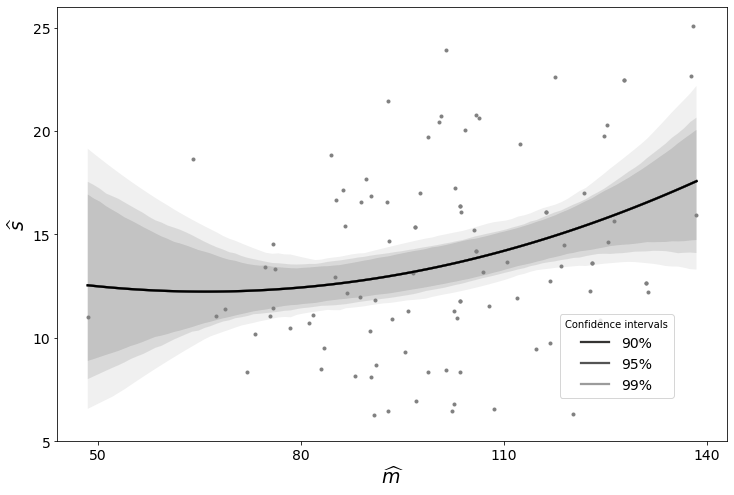

In [18]:
plt.figure(figsize=(12, 8), facecolor = "white")

sns.regplot(features[0], features[1], data = data01, ci = 90, color = "#353433", order = 2, label = "90%", scatter = False)
sns.regplot(features[0], features[1], data = data01, ci = 95, color = "#545454", order = 2, label = "95%", scatter = False)
sns.regplot(features[0], features[1], data = data01, ci = 99, color = "#9b9b9b", order = 2, label = "99%", scatter = False)
sns.regplot(features[0], features[1], data = data01, ci = 0, color = "black", order = 2, label = "", scatter = False)

plt.scatter(features[0], features[1], data = data01, s = 9, color = "#808080", label = "")

plt.legend(title = "Confidence intervals", loc = (.75, .1), prop={'size': 14})

plt.yticks(np.arange(5, 27, 5), size = 14)
plt.xticks(np.arange(50, 150, 30), size = 14)

plt.ylabel(r'$\widehat{s}$', size = 19)
plt.xlabel(r'$\widehat{m}$', size = 19)
plt.savefig("../figs/03scatter_01.png")

## Fitted Line (NO)

In [50]:
data1 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/ScatterFittedLine.dta")
data1.head(3)

,hhid,post,area_cult,revenue
0,15025.0,0.0,11.071095,3.226190
1,19048.0,1.0,2.471546,0.526227
2,14495.0,0.0,1.132170,0.332619


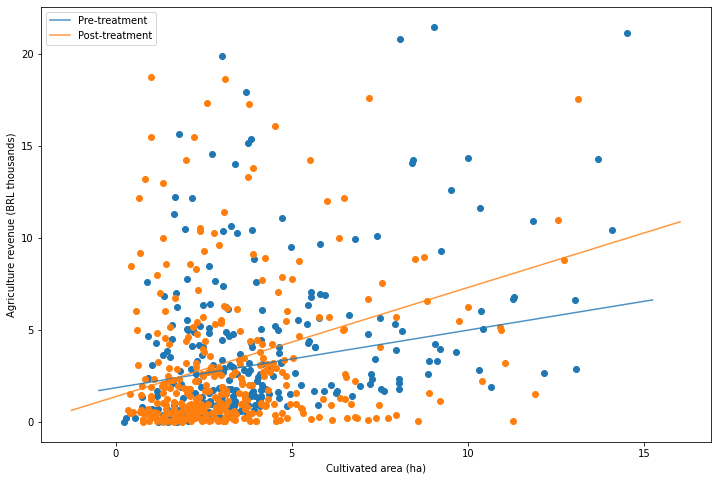

In [74]:
plt.figure(figsize=(12, 8), facecolor="white")
def abline(slope, intercept, lbl = "None"):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-',  alpha = .8, label = lbl)


data10 = data1[data1.post == 0]
data11 = data1[data1.post == 1]

m0, b0 = np.polyfit(data10.area_cult, data10.revenue, 1)
m1, b1 = np.polyfit(data11.area_cult, data11.revenue, 1)
# m,b = np.polyfit(x, y, 1)

lbs = ["Post-treatment", "Pre-treatment"]

plt.scatter('area_cult', 'revenue', data = data1[data1.post == 1], label = "")
plt.scatter('area_cult', 'revenue', data = data1[data1.post == 0], label = "")
abline(m0, b0, lbs[1])
abline(m1, b1, lbs[0])
plt.legend()
plt.xticks(np.arange(0, 16, 5))
plt.yticks(np.arange(0, 21, 5))
plt.xlabel("Cultivated area (ha)")
plt.ylabel("Agriculture revenue (BRL thousands)")
plt.savefig("../figs/03scatter_02.png", bbox_inches='tight', dpi = 400)

# plt.plot()

# plt.legend(loc='lower center', labels=['Hell Yeh', 'Nah Bruh'])

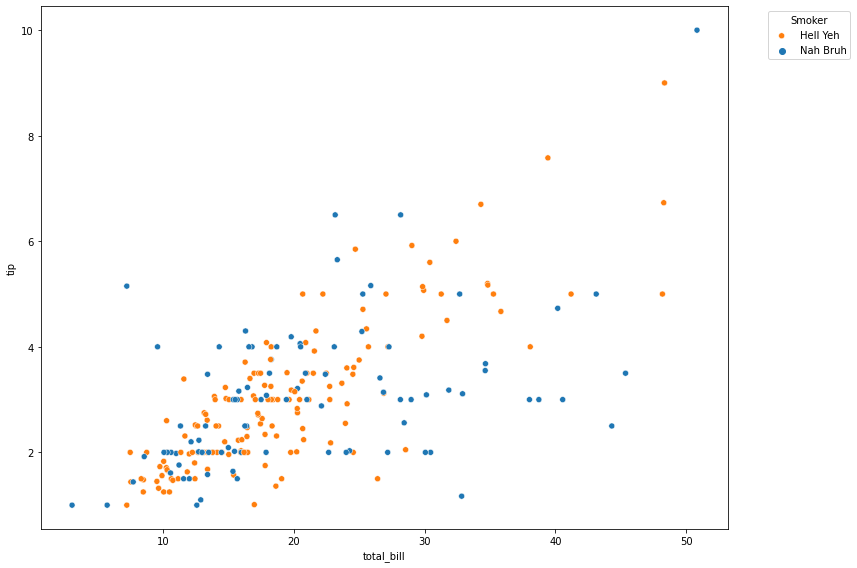

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
tips = sns.load_dataset('tips')
ax = sns.scatterplot(x="total_bill", y="tip", hue="smoker", data=tips, legend='full')
ax.legend(title='Smoker', bbox_to_anchor=(1.05, 1), labels=['Hell Yeh', 'Nah Bruh'])
plt.tight_layout()
plt.show()

## Abline

In [16]:
data3 = pd.read_csv("../data/wd_indicator.csv")
data3.head(3)

,Unnamed: 0,iso2c.x,country,iso3c,iso2c.y,region,capital,longitude,latitude,income,lending,2012,1980
0,1,ZH,Africa Eastern and Southern,AFE,ZH,Aggregates,NaN,NaN,NaN,Aggregates,Aggregates,1513.369728,1468.920961
1,2,ZI,Africa Western and Central,AFW,ZI,Aggregates,NaN,NaN,NaN,Aggregates,Aggregates,1779.266786,1574.175394
2,3,1A,Arab World,ARB,1A,Aggregates,NaN,NaN,NaN,Aggregates,Aggregates,6268.352750,5201.468957


In [17]:
ref_data = data3[data3['iso3c'].str.contains('USA|CHN|BRA|RWA')]

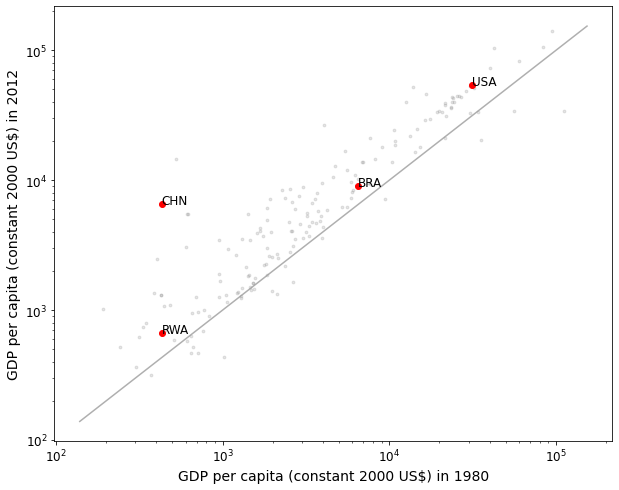

In [21]:
# fig, ax = plt.subplots()
plt.figure(figsize = (10, 8), facecolor = "white")

def abline(slope, intercept, colors = "#8b9b9b"):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color = colors, alpha = .8)
    
p = plt.scatter("1980", "2012", data = data3, color = "#808080", alpha = .2, s = 8)

plt.scatter("1980", "2012", data = ref_data, color = "red")

for i in range(4):
    aux_ref = ref_data.iloc[i]
    x_ref = aux_ref["1980"]
    y_ref = aux_ref["2012"]
    # x_ref1 = x_ref 
    # y_ref1 = x_ref 
    plt.text(x_ref, y_ref, aux_ref['iso3c'], size = 12)
    
    
plt.semilogy()
plt.semilogx()
plt.yticks(size = 12)
plt.xticks(size = 12)

abline(1, 0)
plt.ylabel("GDP per capita (constant 2000 US$) in 2012", size = 14)
plt.xlabel("GDP per capita (constant 2000 US$) in 1980", size = 14)
# matplotlib.artist.top.set_visible(False)
plt.savefig("../figs/03scatter_03.png")


In [22]:
# data4 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/ScatterPlotsStratified.dta")
data4 = pd.read_csv("../data/stratified.csv")
data4.head(3)
data4['value100'] = data4['value'] * 100

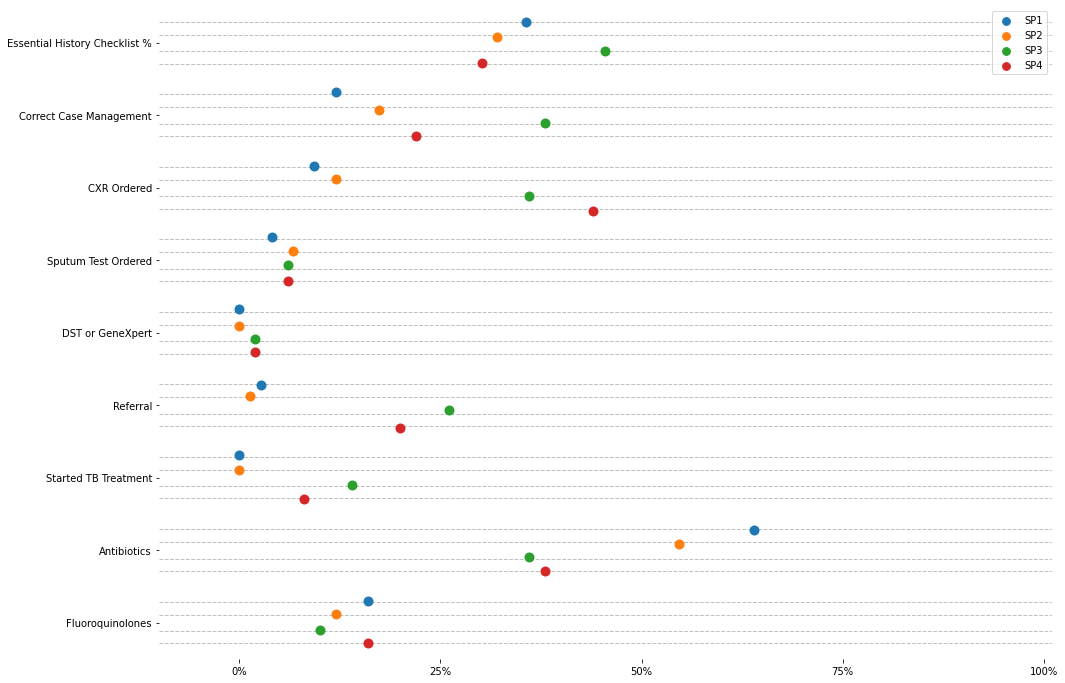

In [44]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16, 12), facecolor = "white")
p = sns.stripplot(
    x="value100", y="key", data=data4, hue = "sp_case", size=10, dodge = True
    , jitter=.12
    # , linewidth=1
             )
# plt.margins(
plt.xlabel("")
plt.ylabel("")
plt.xlim(-10, 101)
# plt.xaxis.set_major_formatter(mtick.PercentFormatter())
# plt.xaxis.set_major_formatter(
p.xaxis.set_major_formatter(mtick.PercentFormatter())
# p.axis.grid(True)
plt.xticks(np.arange(0, 101, 25))

omit = ['right', 'top', 'bottom', 'left']
p.spines[omit].set_visible(False)

p.legend_.set_title("")

label = ["SP1", "SP2", "SP3", "SP4"]
for t, l in zip(p.legend_.texts, label):
    t.set_text(l)
    
# p._legend.set_title("SP")
for i in range(len(set(data4.key))):
# for i in range(2):
    jitter = .12
    j = [i - 2.4 * jitter, i - .9 * jitter, i + jitter, i + 2.4 * jitter]
    for line in j:
        plt.axhline(line, linestyle = "--", color = "#808080", alpha = .5, lw = 1)
plt.savefig("../figs/03scatter_04.png", bbox_inches='tight', dpi = 400)

## Polynomial

In [45]:
data5 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/ScatterPolynomial.dta")
data5 = data5[data5.cons_pae_m_sine < 230]
data6 = data5[data5.cons_pae_m_sine < 230]

c:\python38\lib\site-packages\pandas\io\stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


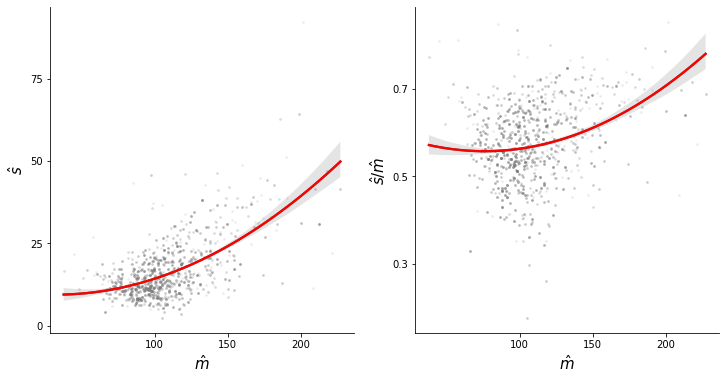

In [49]:
label_size = 15
omit = ['right', 'top']
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False, figsize=(12, 6), facecolor = "white")

fig.subplots_adjust(wspace = .2)

x_l, y_l = "cons_pae_m_sine", "cons_pae_sd_sine"
sns.regplot(x_l, y_l, data = data6, ax = ax1, scatter = False, order = 2, color = "#4f4d4b", ci = 95)
sns.regplot(x_l,"cv", data = data6, ax = ax2, scatter = False, order = 2, color = "#4f4d4b", ci = 95)
sns.regplot(x_l, y_l, data = data6, ax = ax1, scatter = False, order = 2, color = "red", ci = 0)
sns.regplot(x_l,"cv", data = data6, ax = ax2, scatter = False, order = 2, color = "red", ci = 0)
ax1.scatter(x_l, y_l, data = data6, alpha = .1, c = "#808080", s = 3)
ax2.scatter(x_l,"cv", data = data6, alpha = .1, c = "#808080", s = 3)

ax1.set_ylabel(r"$\hat{s}$", size = label_size)
ax1.set_xlabel(r"$\hat{m}$", size = label_size)
ax1.spines[omit].set_visible(False)

ax2.set_ylabel(r"$\hat{s}/\hat{m}$", size = label_size)
ax2.set_xlabel(r"$\hat{m}$", size = label_size)
ax2.spines[omit].set_visible(False)

plt.sca(ax1)
plt.xticks([100, 150, 200])
plt.yticks([0, 25, 50, 75])
plt.sca(ax2)
plt.xticks([100, 150, 200])
plt.yticks([.3, .5, .7])

plt.savefig("../figs/03scatter_05.png", bbox_inches='tight')

# plt.legend()

## Others


In [ ]:
as plt, seaborn as sns
data = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/ScatterFittedLine.dta")
data.head(2)

In [ ]:
sns.lmplot(
    "area_cult", "revenue", hue = "post", data = data
    , ci = None, legend = False
)
plt.legend()